In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

pd.options.display.max_columns = None

In [17]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF,FG_rolling_5,FGA_rolling_5,FG%_rolling_5,3P_rolling_5,3PA_rolling_5,3P%_rolling_5,FT_rolling_5,FTA_rolling_5,FT%_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP FG_rolling_5,OPP FGA_rolling_5,OPP FG%_rolling_5,OPP 3P_rolling_5,OPP 3PA_rolling_5,OPP 3P%_rolling_5,OPP FT_rolling_5,OPP FTA_rolling_5,OPP FT%_rolling_5,OPP ORB_rolling_5,OPP TRB_rolling_5,OPP AST_rolling_5,OPP STL_rolling_5,OPP BLK_rolling_5,OPP TOV_rolling_5,OPP PF_rolling_5
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40


In [18]:
# Rename columns with spaces for better usability

df = df.rename(columns={
    "Home Game": "Home_Game",
    "Points For": "Points_For",
    "Points Against": "Points_Against",
    "Rest Days": "Rest_Days",
    "Ranked Match": "Ranked_Match",
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "FG%": "FG_Percent",
    "3P%": "3P_Percent",
    "FT%": "FT_Percent",
    "OPP FG": "OPP_FG",
    "OPP FGA": "OPP_FGA",
    "OPP FG%": "OPP_FG_Percent",
    "OPP 3P": "OPP_3P",
    "OPP 3PA": "OPP_3PA",
    "OPP 3P%": "OPP_3P_Percent",
    "OPP FT": "OPP_FT",
    "OPP FTA": "OPP_FTA",
    "OPP FT%": "OPP_FT_Percent",
    "OPP ORB": "OPP_ORB",
    "OPP TRB": "OPP_TRB",
    'OPP AST': 'OPP_AST',
    'OPP STL': 'OPP_STL',
    'OPP BLK': 'OPP_BLK',
    'OPP TOV': 'OPP_TOV',
    'OPP PF': 'OPP_PF',
    'FG_rolling_5': 'FG_rolling_5',
    'FGA_rolling_5': 'FGA_rolling_5',
    'FG%_rolling_5': 'FG_Percent_rolling_5',
    '3P_rolling_5': '3P_rolling_5',
    '3PA_rolling_5': '3PA_rolling_5',
    '3P%_rolling_5': '3P_Percent_rolling_5',
    'FT_rolling_5': 'FT_rolling_5',
    'FTA_rolling_5': 'FTA_rolling_5',
    'FT%_rolling_5': 'FT_Percent_rolling_5',
    'ORB_rolling_5': 'ORB_rolling_5',
    'TRB_rolling_5': 'TRB_rolling_5',
    'AST_rolling_5': 'AST_rolling_5',
    'STL_rolling_5': 'STL_rolling_5',
    'BLK_rolling_5': 'BLK_rolling_5',
    'TOV_rolling_5': 'TOV_rolling_5',
    'PF_rolling_5': 'PF_rolling_5',
    'OPP FG_rolling_5': 'OPP_FG_rolling_5',
    'OPP FGA_rolling_5': 'OPP_FGA_rolling_5',
    'OPP FG%_rolling_5': 'OPP_FG_Percent_rolling_5',
    'OPP 3P_rolling_5': 'OPP_3P_rolling_5',
    'OPP 3PA_rolling_5': 'OPP_3PA_rolling_5',
    'OPP 3P%_rolling_5': 'OPP_3P_Percent_rolling_5',
    'OPP FT_rolling_5': 'OPP_FT_rolling_5',
    'OPP FTA_rolling_5': 'OPP_FTA_rolling_5',
    'OPP FT%_rolling_5': 'OPP_FT_Percent_rolling_5',
    'OPP ORB_rolling_5': 'OPP_ORB_rolling_5',
    'OPP TRB_rolling_5': 'OPP_TRB_rolling_5',
    'OPP AST_rolling_5': 'OPP_AST_rolling_5',
    'OPP STL_rolling_5': 'OPP_STL_rolling_5',
    'OPP BLK_rolling_5': 'OPP_BLK_rolling_5',
    'OPP TOV_rolling_5': 'OPP_TOV_rolling_5',
    'OPP PF_rolling_5': 'OPP_PF_rolling_5'
})

In [19]:
# Turn our response variable to categorical

df['Result'] = 1 * (df['Result'] == 'W')
df['BIG_10'] = 1 * (df['Conf'] == 'Big Ten')
df

,Date,Time,Season,Type,Opponent,Rank,Ranked_Match,Conf,Rest_Days,SRS,Result,Points_For,Points_Against,W,L,Home_Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P_Percent,FT,FTA,FT_Percent,ORB,TRB,AST,STL,BLK,TOV,PF,OPP_FG,OPP_FGA,OPP_FG_Percent,OPP_3P,OPP_3PA,OPP_3P_Percent,OPP_FT,OPP_FTA,OPP_FT_Percent,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5,BIG_10
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,0
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,0
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,0
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024-01-18,8:30p,2023-2024,REG,Michigan,NaN,False,Big Ten,0,5.28,1,88,73,13,4,False,1,0,30,62,0.484,6,18,0.333,22,30,0.733,13,38,12,9,4,6,13,30,63,0.476,3,13,0.231,10,12,0.833,7,25,10,1,0,9,18,25.0,61.400000,0.4084,6.200000,20.2,0.309000,20.00,26.000000,0.77360,10.60,35.400000,10.200000,6.2,4.000000,7.000000,80.200000,29.800000,65.000000,0.459200,3.800000,15.800000,0.239000,9.800000,13.0

In [20]:
# Filter to create the training dataset (first 4 seasons)
df_train = df[df['Season'].isin(['2019-2020', '2020-2021', '2021-2022', '2022-2023'])]

# Filter to create the test dataset (most recent season)
df_test = df[df['Season'] == '2023-2024']

# Confirm split
print("Training Set:", df_train['Season'].unique())
print("Test Set:", df_test['Season'].unique())

Training Set: ['2019-2020' '2020-2021' '2021-2022' '2022-2023']
Test Set: ['2023-2024']


In [21]:
# Create a basic model predicting Result from the 5 highest correlated variables
model_1 = smf.logit('Result ~ Lose_Streak + Win_Streak + Points_Against + OPP_FG_Percent + FG_Percent', data=df_train).fit()
print(model_1.summary())

         Current function value: 0.000110
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  128
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.9998
Time:                        01:19:55   Log-Likelihood:              -0.014117
converged:                      False   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.641e-32
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.0696    346.669      0.087      0.931    -649.390     709.529
Lose_Streak      -23.5421    259.225     -0.091      

C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=Perfec

In [22]:
# Predict on training data
train_predictions_1 = model_1.predict(df_train[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
train_accuracy_1 = (train_predictions_1.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_1 = model_1.predict(df_test[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
test_accuracy_1 = (test_predictions_1.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_1)
print("Test Accuracy:", test_accuracy_1)

Training Accuracy: 1.0
Test Accuracy: 1.0


In [23]:
# Suspect that some variables were leading our model to predict the result too easily, so we'll create another with more realistic variables
model_2 = smf.logit('Result ~ FG_Percent + OPP_FG_Percent + OPP_FT + FT + Ranked_Match + Home_Game', data=df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.170819
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  128
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.7250
Time:                        01:19:55   Log-Likelihood:                -21.865
converged:                       True   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.604e-22
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3135      3.809     -0.345      0.730      -8.780       6.153

In [24]:
# Predict on training data
train_predictions_2 = model_2.predict(df_train[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'FT', 'Ranked_Match', 'Home_Game']])
train_accuracy_2 = (train_predictions_2.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_2 = model_2.predict(df_test[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'FT', 'Ranked_Match', 'Home_Game']])
test_accuracy_2 = (test_predictions_2.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_2)
print("Test Accuracy:", test_accuracy_2)

Training Accuracy: 0.921875
Test Accuracy: 0.8157894736842105


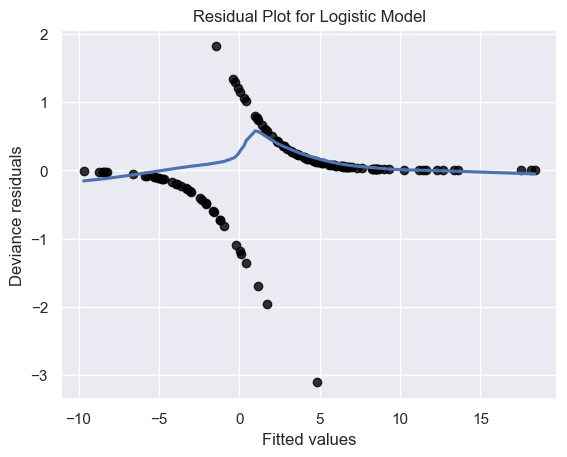

In [25]:
# Plotting residuals for diagnostics
sns.regplot(x=model_2.fittedvalues, y=model_2.resid_dev, color='black', line_kws={'color':'b'}, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Deviance residuals')
plt.title('Residual Plot for Logistic Model')
plt.show()

In [26]:
# Now create a model that would be more realistic with what kind of data we would have before a match
model_3 = smf.logit('Result ~ SRS + Rank + Ranked_Match + Home_Game + FG_Percent_rolling_5 + OPP_FG_Percent_rolling_5', data=df_train).fit()
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 0.622802
         Iterations 6


LinAlgError: Singular matrix

In [14]:
# Predict on training data
train_predictions_3 = model_3.predict(df_train[['SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
train_accuracy_3 = (train_predictions_3.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_3 = model_3.predict(df_test[['SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
test_accuracy_3 = (test_predictions_3.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_3)
print("Test Accuracy:", test_accuracy_3)

NameError: name 'model_3' is not defined

In [15]:
# Plotting residuals for diagnostics
sns.regplot(x=model_3.fittedvalues, y=model_3.resid_dev, color='black', line_kws={'color':'b'}, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Deviance residuals')
plt.title('Residual Plot for Logistic Model')
plt.show()

NameError: name 'model_3' is not defined

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df_clean = df.dropna()
non_numeric = []
for col in df_clean:
    if df_clean[col].dtypes != "float64":
        non_numeric.append(col) #gets rid of non numeric attributes (doesn't work with randomforest?)

X = df_clean.drop(columns= non_numeric) #the features/predictors of our model that don't have nan values
Y = df_clean['Result'] #goal/ what we're trying to predict with random forest regressor 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_prediction = random_forest.predict(X_test)
y_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [123]:
test_data = pd.DataFrame(X_test)
test_data['actual'] = Y_test
test_data['prediction'] = y_prediction
test_data.head()

,Rank,SRS,FG_Percent,3P_Percent,FT_Percent,OPP_FG_Percent,OPP_3P_Percent,OPP_FT_Percent,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5,actual,prediction
132,4.0,19.27,0.350,0.333,0.846,0.435,0.294,0.600,26.2,57.2,0.4592,7.8,25.4,0.2958,10.2,18.2,0.5780,8.6,39.0,12.8,4.0,4.2,11.4,76.4,21.8,62.4,0.3530,4.6,15.8,0.3044,8.0,14.0,0.5868,8.6,33.2,5.8,6.2,1.2,7.2,18.0,0,0
84,3.0,19.15,0.414,0.308,0.800,0.508,0.409,0.722,24.6,54.4,0.4510,7.8,23.6,0.3298,10.4,16.2,0.6176,5.2,29.8,15.0,4.0,3.0,8.4,67.4,23.2,59.2,0.3898,4.8,18.2,0.2624,12.6,16.0,0.7914,8.8,32.0,10.2,4.6,3.2,8.6,18.0,0,0
87,19.0,13.18,0.450,0.296,0.739,0.468,0.381,0.667,24.2,56.4,0.4306,8.4,25.6,0.3290,13.8,19.8,0.6956,7.2,31.4,14.6,6.0,2.8,10.6,70.6,26.4,60.0,0.4390,6.4,19.0,0.3292,11.0,16.0,0.6842,8.2,31.8,13.8,7.0,3.2,11.2,18.8,1,0
160,4.0,22.30,0.484,0.333,0.733,0.476,0.231,0.833,23.6,60.0,0.3952,6.4,20.8,0.3090,19.2,24.4,0.7906,9.4,34.0,10.0,5.0,4.4,7.2,76.8,29.6,66.2,0.4480,4.2,17.0,0.2454,8.8,12.0,0.7346,10.2,33.4,11.6,3.4,4.0,7.4,15.6,1,0
119,14.0,14.94,0.475,0.259,0.800,0.579,0.429,0.789,26.0,56.6,0.4592,6.0,23.6,0.2598,14.4,19.6,0.7268,9.0,34.6,11.0,5.0,4.8,12.2,72.2,24.0,57.2,0.4226,8.0,22.0,0.3560,12.2,15.6,0.7388,6.0,27.6,10.0,6.0,2.2,9.8,17.8,0,1


In [124]:
accuracy = accuracy_score(Y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [125]:
class_report = classification_report(Y_test, y_prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.31      0.36      0.33        10
weighted avg       0.44      0.50      0.47        10



In [32]:
import lightgbm as lgb
training_data = lgb.Dataset(X_train, label = Y_train)
testing_data = lgb.Dataset(X_test, label = Y_test, reference = training_data)
#looking into lightgbm modeling, documentation (https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api)

In [126]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define features and target
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game']
target = 'Result'

# Train-Test Split
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

In [127]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False, 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

/Users/isaac/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=22, ...)

In [128]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7105263157894737

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.78      0.86      0.82        29

    accuracy                           0.71        38
   macro avg       0.56      0.54      0.54        38
weighted avg       0.68      0.71      0.69        38

Test AUC-ROC Score: 0.7164750957854407


<Figure size 1000x600 with 0 Axes>

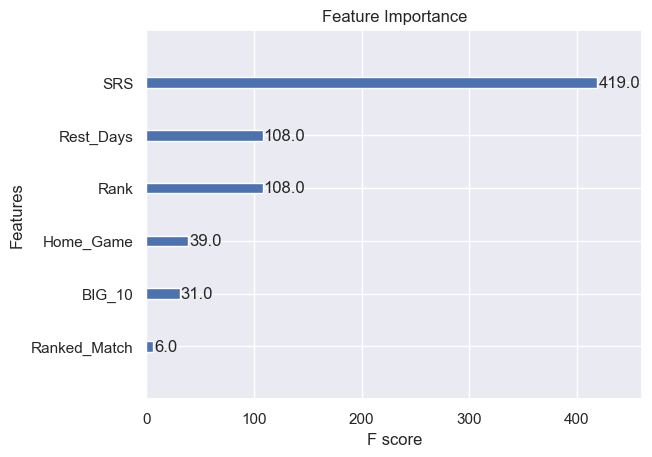

In [129]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()